<a href="https://colab.research.google.com/github/RyoNaruse/aiuaiu/blob/master/test_mlpfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import functools
import os
import datetime
from time import sleep
from collections import deque
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from tqdm import tqdm
import pickle
from google.colab import drive
drive.mount('/content/drive')
# 4/uwHxO9fnnxZTbEWs4WkmSTxHrnc5Z8Z-HiR2CzLkccD4kt_GA-AYg4Y

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install mplfinance
import mplfinance as mpf

     |████████████████████████████████| 61kB 3.7MB/s 


In [2]:
df_5m = pd.read_pickle('./drive/My Drive/Colab Notebooks/df_5m.pickle')
df_1h = pd.read_pickle('./drive/My Drive/Colab Notebooks/df_1h.pickle')
df_1d = pd.read_pickle('./drive/My Drive/Colab Notebooks/df_1d.pickle')
df_trade_results = pd.read_pickle('./drive/My Drive/Colab Notebooks/df_trade_results.pickle')

In [3]:
df_5m.head()

,date,open,high,low,close,hband,lband,direction,sign,group,BB+2std,BB-2std
0,2005-01-10 02:30:00,104.79,104.79,104.77,104.79,NaN,NaN,↓,買,,NaN,NaN
1,2005-01-10 02:35:00,104.79,104.79,104.78,104.79,NaN,NaN,↓,,,NaN,NaN
2,2005-01-10 02:40:00,104.80,104.80,104.74,104.74,NaN,NaN,↓,,,NaN,NaN
3,2005-01-10 02:45:00,104.74,104.75,104.70,104.70,NaN,NaN,↓,,,NaN,NaN
4,2005-01-10 02:50:00,104.71,104.71,104.67,104.68,104.79,104.68,↓,,,NaN,NaN


In [4]:
df_5m = df_5m.rename(columns={'date':'Date','open':'Open','high':'High','low':'Low','close':'Close'})

In [5]:
df_5m['Date'] = pd.to_datetime(df_5m['Date'])
df_5m = df_5m.set_index(df_5m['Date']).drop('Date', axis=1)
# df_5m = df_5m.set_index(df_5m['Date'])


In [21]:
start = 30
end = 50
# bb_columns = ['BB+2std', 'BB-2std']
bb_columns = df_5m.columns.get_loc('BB+2std')
bb = df_5m.iloc[start:end, bb_columns:bb_columns+2]

hl_columns = df_5m.columns.get_loc('hband')
hl = df_5m.iloc[start:end, hl_columns:hl_columns+2]

adps = [mpf.make_addplot(bb),
        mpf.make_addplot(hl)]


In [ ]:
# df_5m[bb_columns]


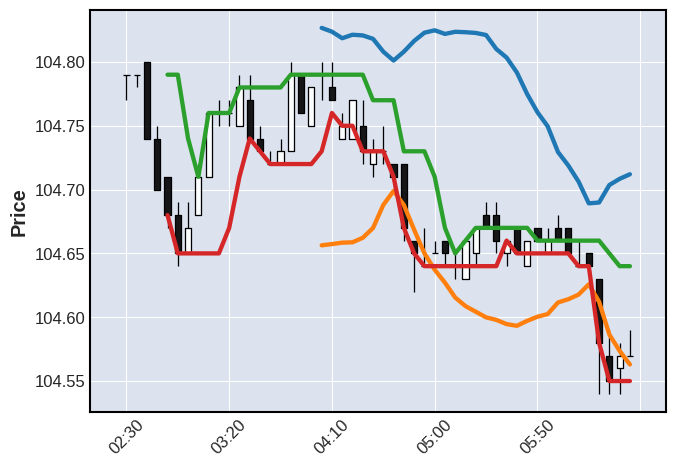

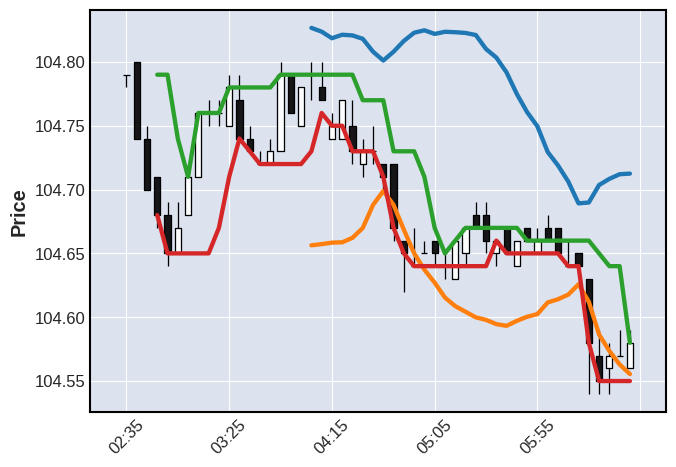

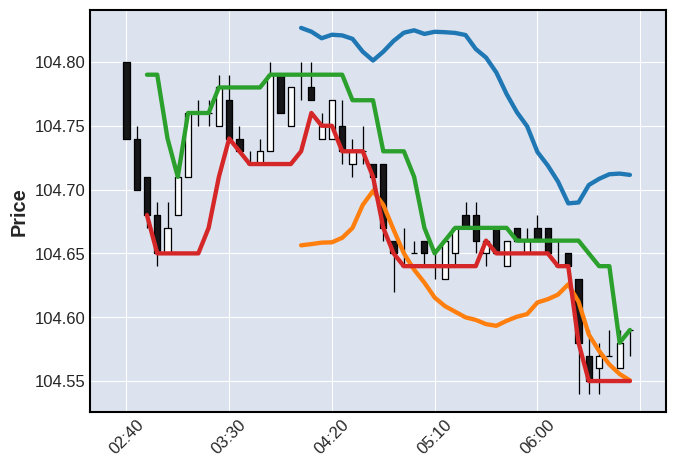

In [33]:

for i in range(3):
  start = i
  end = i+50
  # bb_columns = ['BB+2std', 'BB-2std']
  bb_columns = df_5m.columns.get_loc('BB+2std')
  bb = df_5m.iloc[start:end, bb_columns:bb_columns+2]

  hl_columns = df_5m.columns.get_loc('hband')
  hl = df_5m.iloc[start:end, hl_columns:hl_columns+2]

  adps = [mpf.make_addplot(bb),
          mpf.make_addplot(hl)]
  mpf.plot(df_5m.iloc[start:end,:4], type='candle',
         addplot=adps)
  sleep(0.1)

In [ ]:
df_5m.index

RangeIndex(start=0, stop=1096838, step=1)

In [ ]:
df_5m['Date'].dtype

dtype('<M8[ns]')